# 1 Objetivo
Implementar el modelo de regresión logística binaria con datos relacionados a una condición de salud de las personas para predecir anomalías de corazón y evaluar la exactitud del modelo mediante la matriz de confusión.

# 2 Descripción
Se cargan librerías y se descargan los datos: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv

Los datos están relacionados con aspectos médicos y son valores numéricos de varias variables que caracterizan el estado de salud de 319,795 personas.

Se pretende construir un modelo utilizando algoritmos supervisados para resolver la tarea de clasificación binaria e identificar si una persona padece del corazón o no.

Se construyen datos de entrenamiento y validación al 80% y 20% cada uno.

Se desarrollan los modelos de:

- Regresión Logística binaria
- Árbol de Clasificación tipo class
- K Means
- SVM Lineal
- SVM Polinomial
- SVM Radial
Los modelo se aceptan si tienen un valor de exactitud (“Accuracy”) por encima del 70%..

El modelo se construye con funciones de librerías de python

# 3 Fundamento teórico
La regresión logística ofrece solución para clasificar y para predecir valores lógicos, es decir con un valor etiquetado tal vez 0 o 1; bueno o malo, alto o bajo, entre otras etiquetas que distingan una polaridad o significado dicotómico, o un valor u otro.

Para predicciones el modelo de regresión logística binaria encuentra la probabilidad de ocurrencia de un evento determinado y dicha probabilidad se hallará siempre dentro del rango.

Cuando la variable respuesta posee dos categorías, entonces se estará delante de una regresión logística binaria.

En cambio, si la variable respuesta posee más de dos categorías, se usará la regresión logística multinomial .

El resultado real de muchos algoritmos de clasificación binaria es una puntuación de predicción en términos de probabilidad. La probabilidad indica la posible del modelo de que la observación dada pertenezca a la clase positiva.

Para tomar la decisión sobre si la observación debe clasificarse como positiva o negativa, como interpretación de la probabilidad se define el umbral de clasificación o el corte que normalmente es 50% arriba es positiva y 50% abajo es negativa y compara con la puntuación con dicho umbral de la predicción.

Cualquier observación con puntuaciones superiores al umbral se prevé como la clase positiva y las puntuaciones inferiores al umbral se prevén como la clase negativa.(Amazon Mahine Learning, n.d.).

En este caso que se presenta y describe a continuación, se utiliza la regresión logística binomial como parte de los algoritmos supervisados de machine learning.

El modelo requiere una cantidad de variables independientes del modelo x1,x2...xn ó β1,β2...βn.

Se debe identificar la variable dependiente Y o la variable respuesta de tipo binaria, donde cada componente de 𝑌 se distribuye mediante una distribución de Bernoulli [0|1].

Se necesitan n el número de observaciones.

Entonces X=(x1,…,xn)T el conjunto de variable independientes.

Se identifica como θ el vector de parámetros asociado al modelo, de forma que θ∈Rk+1 que significa que los valores del vector resultante pertenecen a cada una de las variables.

Sea π(θTxi) la probabilidad de que Yi tome un valor igual a 1, entonces su modelo se puede escribir como:

π(θTxi)=P(Y=1|X=x)=11+e

Si θTxi los valores ajustados toma valores elevados y positivos, entonces … … se aproximará a 0 y, en consecuencia, el valor de la función anterior será igual a 1. En caso de que θTxi tome valores elevados pero negativos, entonces el valor de la función será 0 dado que eθTxi tenderá a infinito. (Zang 2020).

El valor e como número irracional y basado en la teoría de logaritmos naturales es el valor constante que se puede obtener en lenguaje R con la función exp(1) igual a r exp(1).

Efectuando la transformación logit a la expresión inicial, se obtiene:

logit(π(θTxi))=ln(π(θTxi)1−π(θTxi))

que significa calcular el logaritmo natural de cada valor de de xi para determinar su probabilidad.

# 4 Desarrollo
## 4.1 Cargar librerías
Librería nueva que hay que nstalar:

- py_install(“plotnine”) # desde R es para gráficos ggplot en caso de usarse
- py_install(“sidetable”) para tablas de frecuencias se usa en gráficos de barras

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Estadísticas
import scipy
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

# Graficos ggplot similar a R
import plotnine
from plotnine import *  # Antes instalar > py_install("plotnine") desde R o Python

# tablas de frecuencias
import sidetable as stbER

## 4.2 Cargar datos
Se cargan datos del enlace URL, se observan los primeros y últimos registros del conjunto de datos.

In [3]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv")
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


## 4.3 Exploración de datos
Son 319795 observaciones y 18 variables

In [4]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [5]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
datos.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

### 4.3.1 Visualización de datos
#### 4.3.1.1 ¿Cuántos casos hay de cada clase?
Hay 292422 casos sin daño al corazón y el resto que si tienen daño 27373.

In [7]:
frecuencia = (datos.groupby("HeartDisease").agg(frecuencia=("HeartDisease","count")).reset_index())
  
frecuencia

,HeartDisease,frecuencia
0,No,292422
1,Yes,27373


<BarContainer object of 2 artists>

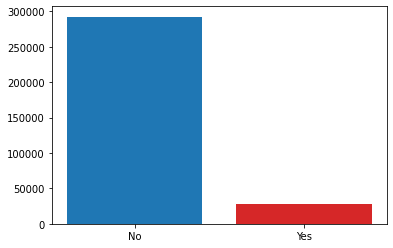

In [8]:
fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['HeartDisease'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

In [9]:
ax.set_ylabel('Frecuencia')
ax.set_title('Daños al Corazón')
ax.legend(title='Daño')

plt.show()
# plt.gcf().clear()

#### 4.3.1.2 Histogramas de datos numéricos
Histograma únicamente de las variables numéricas del conjunto de datos ‘BMI’, ‘PhysicalHealth’, ‘MentalHealth’, ‘SleepTime’.

array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

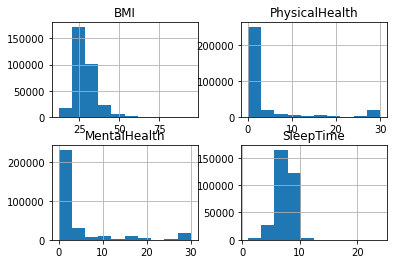

In [10]:
datos[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].hist()

#### 4.3.1.3 Diagramas de frecuencias de datos categóricos
Diagramas de frecuencias con barras de las variables categóricas: ‘Smoking’, ‘AlcoholDrinking’, ‘Stroke’, …,.



<BarContainer object of 2 artists>

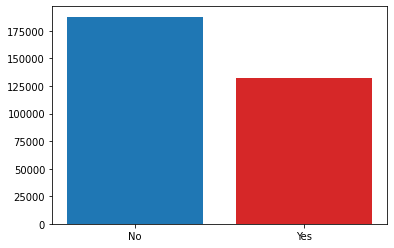

In [11]:
frecuencia = (datos.groupby("Smoking").agg(frecuencia=("Smoking", "count")).reset_index())

fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['Smoking'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

In [12]:
ax.set_ylabel('Frecuencia')
ax.set_title('Fumador')
ax.legend(title='Daño')

plt.show()
plt.gcf().clear()

<Figure size 432x288 with 0 Axes>

## 4.4 Transformar datos
Crear variable llamada HeartDisease01 que se utilizará en el modelo de Regresión Logística tendrá valores 0 de para ‘No’ daño y 1 para si hay daño (‘Yes’).

In [13]:
datos['HeartDisease01'] = np.where(datos ['HeartDisease']== "Yes", 1, 0)

Quitar la variable HeartDisease que ya tiene variable transformada a HeartDisease01



In [14]:
datos = datos.drop("HeartDisease", axis='columns')

Quedaron las columnas:

In [15]:
datos.columns.values

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease01'], dtype=object)

### 4.4.1 Las variables de interés
Todas las variables de entrada o variables independientes:

- “BMI”: Indice de masa corporal con valores entre 12.02 y 94.85.
- “Smoking”: Si la persona es fumadora o no con valores categóritos de ‘Yes’ o ‘No’.
- “AlcoholDrinking” : Si consume alcohol o no, con valores categóricos de ‘Yes’ o ‘No’.
- “Stroke”: Si padece alguna anomalía cerebrovascular, apoplejia o algo similar, con valores categóricos de ‘Yes’ o ‘No’.
- “PhysicalHealth” Estado físico en lo general con valores entre 0 y 30.
- “MentalHealth”. Estado mental en lo general con valores entre 0 y 30.
- “DiffWalking” . Que si se le dificulta caminar o tiene algún padecimiento al caminar, con valores categóritoc de ‘Yes’ o ‘No’.
- “Sex”: Género de la persona, con valores de ‘Female’ y ‘Male’ para distinguir al género femenino y masculino respectivamente.
- “AgeCategory”: Una clasificación de la edad de la persona de entre 18 y 80 años. La primera categoría con un rango de edad entre 18-24, a partir de 25 con rangos de 5 en 5 hasta la clase de 75-80 y una última categoría mayores de 80 años.
- “Race”. Raza u origen de la persona con valores categóricos de ‘American Indian/Alaskan Native’, ’Asian’,’Black’, ’Hispanic’, ’Other’ y’White’.
- “Diabetic”. Si padece o ha padecido de diabetes en cuatro condiciones siendo Yes y No para si o no: ‘No’, ‘borderline diabetes’ condición antes de detectarse diabetes tipo 2, ‘Yes’, y ‘Yes (during pregnancy)’ durante embarazo.
- “PhysicalActivity” que si realiza actividad física, con valores categóricos de ‘Yes’ o ‘No’.
- “GenHealth”: EStado general de salud de la persona con valores categóricos de ‘Excellent’, ‘Very good’, ‘Good’, ‘Fair’ y ‘Poor’ con significado en español de excelente, muy buena, buena, regular y pobre o deficiente.
- “SleepTime”: valor numérico de las horas de sueño u horas que duerme la persona con valores en un rango entre 1 y 24.
- “Asthma”: si padece de asma o no, con valores categóricos de ‘Yes’ o ‘No’.
- “KidneyDisease”: si tiene algún padecimiento en los riñones, con valores categóricos de ‘Yes’ o ‘No’.
- “SkinCancer”: si padece algún tipo de cáncer de piel, con valores categóricos de ‘Yes’ o ‘No’.

La variable de interés como dependiente o variable de salida es la de daño al corazón (HeartDisease), con valores categóricos de ‘Yes’ o ‘No’ , ahora la variable HeartDisease01 con valores ‘1’ o ‘0’.
Nuevamente la descripción de variables y ahora son 319795 observaciones y 18 variables

In [16]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [17]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease01'],
      dtype='object')

In [18]:
datos.dtypes

BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
HeartDisease01        int32
dtype: object

### 4.4.2 Construir variables Dummys
Existen variables que son categóricas: ‘Smoking’, ‘AlcoholDrinking’, ‘Stroke’, ‘DiffWalking’, ‘Sex’, ‘AgeCategory’, ‘Race’, ‘Diabetic’, ‘PhysicalActivity’, ‘GenHealth’, ‘Asthma’, ‘KidneyDisease’, ‘SkinCancer’.

Con estas variables, crear variables Dummys y construir un conjunto de datos que incluye las variable dummis.

El método de la librería de Pandas llamado get_dummies() convierte los datos categóricos en variables indicadoras o ficticias.



In [19]:
datos_dummis = pd.get_dummies(datos, drop_first = True)
datos_dummis

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease01,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,7.0,0.0,6.0,1,1,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
319791,29.84,0.0,0.0,5.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
319792,24.24,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,32.81,0.0,0.0,12.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Asi queda el conjunto de datos preparado llamado datos_dummis

In [20]:
datos_dummis.dtypes

BMI                                 float64
PhysicalHealth                      float64
MentalHealth                        float64
SleepTime                           float64
HeartDisease01                        int32
Smoking_Yes                           uint8
AlcoholDrinking_Yes                   uint8
Stroke_Yes                            uint8
DiffWalking_Yes                       uint8
Sex_Male                              uint8
AgeCategory_25-29                     uint8
AgeCategory_30-34                     uint8
AgeCategory_35-39                     uint8
AgeCategory_40-44                     uint8
AgeCategory_45-49                     uint8
AgeCategory_50-54                     uint8
AgeCategory_55-59                     uint8
AgeCategory_60-64                     uint8
AgeCategory_65-69                     uint8
AgeCategory_70-74                     uint8
AgeCategory_75-79                     uint8
AgeCategory_80 or older               uint8
Race_Asian                      

## 4.5 Datos de entrenamiento y validación
Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 1550.

In [21]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos_dummis.drop(columns = "HeartDisease01"), datos_dummis['HeartDisease01'],train_size = 0.80,  random_state = 1550)

### 4.5.1 Datos de entrenamiento


In [22]:
X_entrena

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
159791,28.72,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
138653,35.43,30.0,0.0,6.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
240854,28.06,0.0,0.0,7.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
148806,25.10,0.0,2.0,6.0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
215296,24.39,0.0,5.0,5.0,1,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152847,30.29,15.0,0.0,7.0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
199093,20.34,0.0,5.0,7.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
290441,21.30,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
187929,30.90,0.0,15.0,8.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0


### 4.5.2 Datos de validación


In [23]:
X_valida

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
135405,32.55,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
37902,33.36,0.0,0.0,7.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
273260,19.58,0.0,3.0,6.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
276747,22.24,20.0,20.0,5.0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
17367,28.06,0.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181967,37.71,0.0,0.0,6.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
263494,28.32,4.0,0.0,8.0,1,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
174935,35.44,2.0,0.0,6.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
239431,24.96,0.0,0.0,8.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


## 4.6 Modelos Supervisados de Clasificación
Se construye un modelo de regresión logística con los datos de entrenamiento y las variables independientes.

In [24]:
modelo_rlog = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=1000)
modelo_rlog.fit(X_entrena, Y_entrena)

LogisticRegression(max_iter=1000)

In [25]:
print(modelo_rlog.score(X_entrena, Y_entrena))

0.915824981628856


### 4.6.1 Predicciones
Se hacen predicciones con los datos de validación. Se observan las primeras 10.

In [26]:
predicciones_rlog = modelo_rlog.predict(X_valida)
print(predicciones_rlog)

[0 0 0 ... 0 0 0]


### 4.6.2 Tabla comparativa


In [27]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(HeartDisease_Real = Y_valida)
comparaciones = comparaciones.assign(HeartDisease_Pred = predicciones_rlog.flatten().tolist())
print(comparaciones)

          BMI  PhysicalHealth  MentalHealth  SleepTime  Smoking_Yes  \
135405  32.55             0.0           0.0        6.0            0   
37902   33.36             0.0           0.0        7.0            0   
273260  19.58             0.0           3.0        6.0            0   
276747  22.24            20.0          20.0        5.0            0   
17367   28.06             0.0           0.0        8.0            0   
...       ...             ...           ...        ...          ...   
181967  37.71             0.0           0.0        6.0            0   
263494  28.32             4.0           0.0        8.0            1   
174935  35.44             2.0           0.0        6.0            0   
239431  24.96             0.0           0.0        8.0            0   
309753  20.60            30.0           0.0        7.0            1   

        AlcoholDrinking_Yes  Stroke_Yes  DiffWalking_Yes  Sex_Male  \
135405                    0           0                0         1   
37902  

### 4.6.3 Evaluación del modelo
Se evalúa el modelo con la matriz de confusión

#### 4.6.3.1 Matriz de confusión

In [28]:
print(confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

[[57968   503]
 [ 4866   622]]


#### 4.6.3.2 ¿A cuantos le atina el modelo?

In [29]:
print(classification_report(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58471
           1       0.55      0.11      0.19      5488

    accuracy                           0.92     63959
   macro avg       0.74      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



El modelo le atina aproximadamente al 92%, accuracy = 0.92

### 4.6.4 Predicciones con datos nuevos
Se crea un registro de una persona con ciertas condiciones de salud a partir de un diccionario.

In [30]:
# Se crea un diccionario
registro = {'BMI': 38, 'PhysicalHealth': 2, 'MentalHealth': 5, 'SleepTime' : 12, 'Smoking_Yes' : 1, 'AlcoholDrinking_Yes' : 1, 'Stroke_Yes' : 1, 'DiffWalking_Yes': 1, 'Sex_Male': 1, 'AgeCategory_70-74': 1, 'Race_Black' : 1, 'Diabetic_Yes' : 1, 'PhysicalActivity_Yes' : 0, 'GenHealth_Fair' : 1, 'Asthma_Yes' : 1, 'KidneyDisease_Yes':1, 'SkinCancer_Yes': 0}
persona = pd.DataFrame()
persona = persona.append(registro, ignore_index=True)

C:\Users\katod\AppData\Local\Temp\ipykernel_15440\2727011658.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [31]:
persona

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_70-74,Race_Black,Diabetic_Yes,PhysicalActivity_Yes,GenHealth_Fair,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,38,2,5,12,1,1,1,1,1,1,1,1,0,1,1,1,0


Se hace la predicción con estos valores de si tiene o no daño en el corazón: Faltan algunas variables lo que pasa es que fueron construidas cpmo variables Dummys…



In [40]:
# prediccion = modelo_rlog.predict(persona)
# print(prediccion)

# 5 Interpretación
Se utilizará la semilla 1550 junto con una partición del 80/20 para los datos de entrenamiento y validación. 

Según la matriz de confusión, la certeza del modelo es de .92, osea, el modelo acierta el 92% de las veces. 

Del total de los datos, un total de 57968 son verdaderos positivos, 503 son verdaeros negativos, 4866 falsos positivos y 622 falsos negativos.